In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
hyperparam_results = pd.read_csv('results_lstm.csv')
final_results = pd.read_csv('truth_prediction_lstm.csv')
final_by_epoch = pd.read_csv('train_val_accs_lstm.csv')

In [7]:
print(hyperparam_results.drop('epochs', axis=1).to_latex())

\begin{tabular}{lrrr}
\toprule
 & learning_rate & weight_decay & test_acc \\
\midrule
0 & 0.001000 & 0.000000 & 0.343875 \\
1 & 0.001000 & 0.000100 & 0.233688 \\
2 & 0.001000 & 0.000500 & 0.066578 \\
3 & 0.000500 & 0.000000 & 0.305593 \\
4 & 0.000500 & 0.000100 & 0.363848 \\
5 & 0.000500 & 0.000500 & 0.066578 \\
6 & 0.000100 & 0.000000 & 0.262317 \\
7 & 0.000100 & 0.000100 & 0.277963 \\
8 & 0.000100 & 0.000500 & 0.066578 \\
\bottomrule
\end{tabular}



In [16]:
labels = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'silence', 'stop', 'unknown', 'up', 'yes']

class_report = classification_report(final_results['truth'], final_results['pred'], target_names=labels, output_dict=True)
print(pd.DataFrame(class_report).transpose().to_latex())

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
down & 0.601533 & 0.620553 & 0.610895 & 253.000000 \\
go & 0.382436 & 0.537849 & 0.447020 & 251.000000 \\
left & 0.645161 & 0.224719 & 0.333333 & 267.000000 \\
no & 0.495868 & 0.714286 & 0.585366 & 252.000000 \\
off & 0.650943 & 0.526718 & 0.582278 & 262.000000 \\
on & 0.657980 & 0.821138 & 0.730561 & 246.000000 \\
right & 0.764192 & 0.675676 & 0.717213 & 259.000000 \\
silence & 0.683453 & 0.950000 & 0.794979 & 200.000000 \\
stop & 0.935323 & 0.755020 & 0.835556 & 249.000000 \\
unknown & 0.542857 & 0.320675 & 0.403183 & 237.000000 \\
up & 0.595687 & 0.812500 & 0.687403 & 272.000000 \\
yes & 0.892857 & 0.683594 & 0.774336 & 256.000000 \\
accuracy & 0.631491 & 0.631491 & 0.631491 & 0.631491 \\
macro avg & 0.654024 & 0.636894 & 0.625177 & 3004.000000 \\
weighted avg & 0.653986 & 0.631491 & 0.622207 & 3004.000000 \\
\bottomrule
\end{tabular}



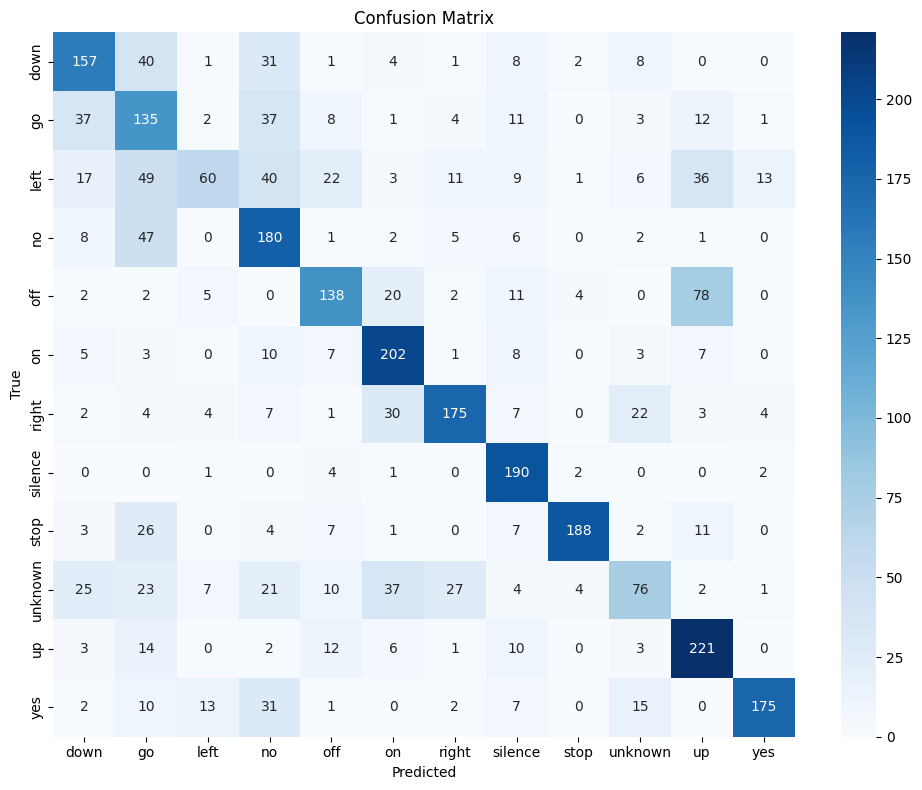

<Figure size 640x480 with 0 Axes>

In [20]:
cm = confusion_matrix(final_results['truth'], final_results['pred'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

plt.savefig('confusion_matrix_lstm.png')

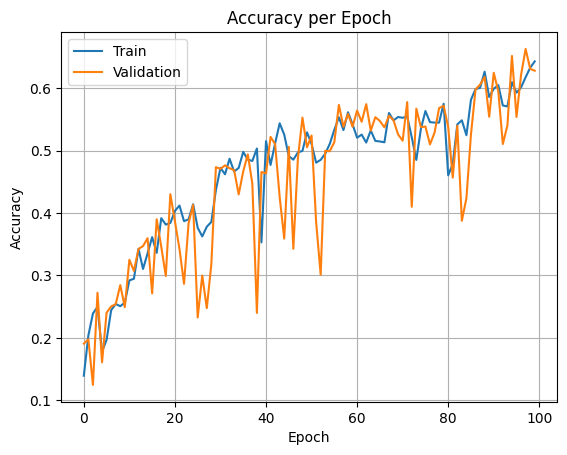

In [19]:
plt.plot(final_by_epoch['train'], label="Train")
plt.plot(final_by_epoch['val'], label="Validation")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.savefig('confusion_matrix_lstm.png')